# General

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 13)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 20
%matplotlib inline

/mnt/store/judit/.virtualenvs/deep/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/mnt/store/judit/.virtualenvs/deep/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## A few utility functions

In [2]:
from functools import reduce

def filter_similar(df, row, columns):
    filt = reduce(lambda x, y: x & (df[y] == row[y]), columns, True)
    return df[filt]

## Loading the tables

In [3]:
ffnn = pd.read_table('results/ffnn_results.tsv')
rnn = pd.read_table('results/rnn_results.tsv')

# Experiment 1: POS classification

Filter result tables

In [4]:
exp1_ffnn = ffnn[ffnn['feat.tag_filter'] == "('NOUN', 'VERB')"].copy()
exp1_rnn = rnn[rnn['featurizer.label_filter'] == "('NOUN', 'VERB')"].copy()

In [5]:
feat_params = [
    'feat.N', 'feat.last_char', 'feat.sample_per_class',
]
model_params = [
    'model.batch_size', 'model.layers', 'model.nb_epoch',
]
result_cols = [
    'result.test_acc'
]
display_filter = feat_params + model_params + result_cols

In [6]:
ffnn[display_filter].to_csv('results/ffnn_readable.csv', sep='\t', index=True)

## Best experiment

In [16]:
best = exp1_ffnn.loc[exp1_ffnn['result.test_acc'].idxmax()] #[display_filter]
#best.to_frame().sort_index()

In [22]:
b = exp1_ffnn[exp1_ffnn['feat.N'] == 2]
b.loc[b['result.test_acc'].idxmax()].to_frame().sort_index()

,292
feat.N,2
feat.data_path,/mnt/store/hlt/Language/Hungarian/Crawl/Web2/a...
feat.early_stopping,NaN
feat.encoding,latin2
feat.grep_filter,NaN
feat.include_smaller_ngrams,True
feat.last_char,6
feat.max_lines,1e+07
feat.sample_per_class,30000
feat.shuffled,NaN


Find experiments which only differ in `last_char`

In [8]:
lc_diff = filter_similar(exp1_ffnn, best, ['feat.N', 'feat.sample_per_class', 'model.batch_size', 'model.layers', 'model.nb_epoch'])
lc_diff[display_filter].sort_values('result.test_acc')

,feat.N,feat.last_char,feat.sample_per_class,model.batch_size,model.layers,model.nb_epoch,result.test_acc
281,3.0,1.0,30000.0,500.0,"(40, 40)",300.0,0.730000
280,3.0,2.0,30000.0,500.0,"(40, 40)",300.0,0.850833
279,3.0,3.0,30000.0,500.0,"(40, 40)",300.0,0.924167
278,3.0,4.0,30000.0,500.0,"(40, 40)",300.0,0.947083
253,3.0,5.0,30000.0,500.0,"(40, 40)",300.0,0.957667
8,3.0,5.0,30000.0,500.0,"(40, 40)",300.0,0.959750
10,3.0,7.0,30000.0,500.0,"(40, 40)",300.0,0.963667
9,3.0,6.0,30000.0,500.0,"(40, 40)",300.0,0.964000
11,3.0,8.0,30000.0,500.0,"(40, 40)",300.0,0.965333
277,3.0,9.0,30000.0,500.0,"(40, 40)",300.0,0.967000


In [9]:
lc_diff.groupby('feat.last_char').mean()['result.test_acc'].to_frame()

,result.test_acc
feat.last_char,
1.0,0.730000
2.0,0.850833
3.0,0.924167
4.0,0.947083
5.0,0.958708
6.0,0.964000
7.0,0.963667
8.0,0.965333
9.0,0.967000


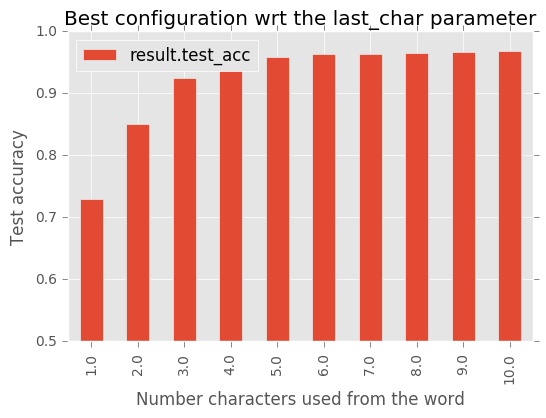

In [10]:
fig = plt.figure()
lc_diff.groupby('feat.last_char').mean().plot(y='result.test_acc', kind='bar', ylim=(0.5, 1),
                                             title='Best configuration wrt the last_char parameter')
_ = plt.xlabel('Number characters used from the word')
_ = plt.ylabel('Test accuracy')

## Best (or almost best) configuration with varying N

Most experiments were run with `last_char` set to 6 to decrease the size of the matrices while keeping accuracy high.

In [11]:
N_diff = filter_similar(exp1_ffnn, exp1_ffnn.loc[9], ['feat.last_char', 'feat.sample_per_class', 'model.batch_size', 'model.layers', 'model.nb_epoch'])
N_diff[display_filter].sort_values('result.test_acc')

,feat.N,feat.last_char,feat.sample_per_class,model.batch_size,model.layers,model.nb_epoch,result.test_acc
1,1.0,6.0,30000.0,500.0,"(40, 40)",300.0,0.88875
315,2.0,6.0,30000.0,500.0,"(40, 40)",300.0,0.94525
5,2.0,6.0,30000.0,500.0,"(40, 40)",300.0,0.94725
9,3.0,6.0,30000.0,500.0,"(40, 40)",300.0,0.96400


## Number of neurons in the hidden layers

Both hidden layers are tested in `range(10, 101, 10)` and the best and worst of the 100 combinations are:

In [12]:
sim = filter_similar(exp1_ffnn, exp1_ffnn.loc[5], ['feat.last_char', 'feat.sample_per_class',
                                                   'feat.N', 'model.batch_size', 'model.nb_epoch'])
sim.sort_values('result.test_acc', ascending=False)[display_filter].head()

,feat.N,feat.last_char,feat.sample_per_class,model.batch_size,model.layers,model.nb_epoch,result.test_acc
292,2.0,6.0,30000.0,500.0,"(20, 10)",300.0,0.954500
318,2.0,6.0,30000.0,500.0,"(40, 70)",300.0,0.952250
332,2.0,6.0,30000.0,500.0,"(60, 10)",300.0,0.951917
366,2.0,6.0,30000.0,500.0,"(90, 50)",300.0,0.951833
322,2.0,6.0,30000.0,500.0,"(50, 10)",300.0,0.951500


In [13]:
sim.sort_values('result.test_acc')[display_filter].head()

,feat.N,feat.last_char,feat.sample_per_class,model.batch_size,model.layers,model.nb_epoch,result.test_acc
305,2.0,6.0,30000.0,500.0,"(30, 40)",300.0,0.939417
378,2.0,6.0,30000.0,500.0,"(100, 70)",300.0,0.941917
284,2.0,6.0,30000.0,500.0,"(10, 30)",300.0,0.942333
324,2.0,6.0,30000.0,500.0,"(50, 30)",300.0,0.942667
288,2.0,6.0,30000.0,500.0,"(10, 70)",300.0,0.942750


# RNN

In [14]:
feat_params = [
    'featurizer.max_len', 'featurizer.max_sample_per_class',
]
model_params = [
    'model.batch_size', 'model.cells', 'model.lr', 'model.nb_epoch', 'model.rnn_type'
]
result_cols = [
    'result.test_acc'
]
display_filter = feat_params + model_params + result_cols

### Saving human readable columns to a separate file

In [15]:
rnn[display_filter].to_csv('results/rnn_readable.tsv', sep='\t', index=True)

## The best

In [16]:
best = exp1_rnn.loc[exp1_rnn['result.test_acc'].idxmax()]
best[display_filter].to_frame()

,2178
featurizer.max_len,9
featurizer.max_sample_per_class,30000
model.batch_size,512
model.cells,125
model.lr,0.01
model.nb_epoch,500
model.rnn_type,gru
result.test_acc,0.956167


## Varying the number of LSTM / GRU cells

In [17]:
compare_params = [
    'featurizer.max_sample_per_class', 'featurizer.max_len',
    'model.batch_size', 'model.nb_epoch', 'model.lr'
]

,lstm,gru
1.0,0.823833,0.781167
2.0,0.888833,0.866333
5.0,0.909667,0.914667
10.0,0.928333,0.921167
20.0,0.945000,0.942333
25.0,0.943333,0.946000
50.0,0.948333,0.949167
75.0,0.953667,0.953417
100.0,0.946833,0.952417
125.0,0.953667,0.956083


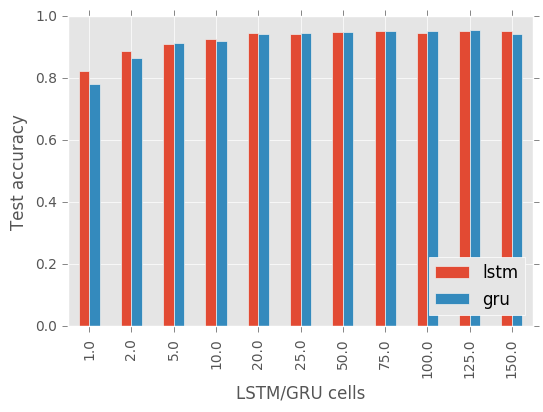

In [18]:
d = filter_similar(exp1_rnn, best, compare_params)[display_filter]

df2 = pd.DataFrame(columns=['lstm', 'gru'])
for g, frame in d.groupby(compare_params + ['model.cells']):
    gru = frame[frame['model.rnn_type'] == 'gru'].mean()['result.test_acc']
    lstm = frame[frame['model.rnn_type'] == 'lstm'].mean()['result.test_acc']
    df2.loc[g[-1]] = pd.Series({'lstm': lstm, 'gru': gru})
    
fig = plt.figure()
df2.plot(y=['lstm', 'gru'], kind='bar')
plt.xlabel("LSTM/GRU cells")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=[1, 0.25])
df2

## Varying maxlen

maximum length of the input sequence - this is roughly the same parameter as `last_char`

In [19]:
compare_params = [
    'featurizer.max_sample_per_class',
    'model.batch_size', 'model.cells', 'model.nb_epoch', 'model.lr'
]

In [20]:
d = filter_similar(exp1_rnn, best, compare_params)[display_filter]

,lstm,gru
1.0,0.500000,0.496667
2.0,0.638167,0.622833
3.0,0.831167,0.813833
4.0,0.892000,0.900333
5.0,0.942083,0.935083
6.0,0.951708,0.943750
7.0,0.955167,0.941417
8.0,0.953917,0.949500
9.0,0.953667,0.956083


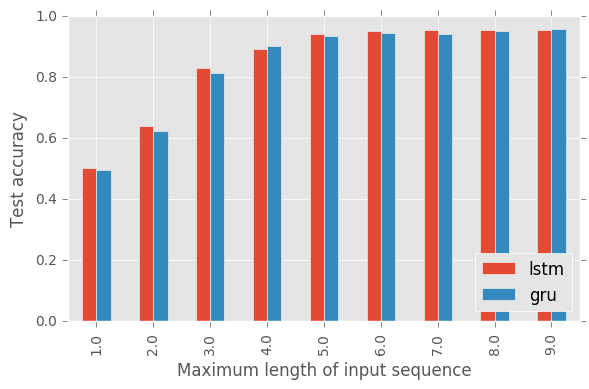

In [21]:
df2 = pd.DataFrame(columns=['lstm', 'gru'])
for g, frame in d.groupby(compare_params + ['featurizer.max_len']):
    gru = frame[frame['model.rnn_type'] == 'gru'].mean()['result.test_acc']
    lstm = frame[frame['model.rnn_type'] == 'lstm'].mean()['result.test_acc']
    df2.loc[g[-1]] = pd.Series({'lstm': lstm, 'gru': gru})

fig = plt.figure()
df2.plot(y=['lstm', 'gru'], kind='bar')
plt.xlabel("Maximum length of input sequence")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=[1, 0.25])
plt.tight_layout()
plt.savefig('lstm_gru.png', dpi=900)

df2

## Other POS tags

In [22]:
pos = ffnn[(ffnn['feat.tag_filter'].notnull() == True) & (ffnn['feat.grep_filter'].notnull() == False)]
pos.groupby('feat.tag_filter').max()['result.test_acc'].to_frame()

,result.test_acc
feat.tag_filter,
"('ADV', 'ADJ')",0.976594
"('CONJ', 'NOUN')",0.990805
"('CONJ', 'NOUN', 'ADJ', 'VERB')",0.850165
"('NOUN', 'VERB')",0.967333


In [23]:
pos = rnn[(rnn['featurizer.label_filter'].notnull() == True) & (rnn['featurizer.grep_filter'].notnull() == False)]
pos.groupby('featurizer.label_filter').max()['result.test_acc'].to_frame()

,result.test_acc
featurizer.label_filter,
"('ADV', 'ADJ')",0.968000
"('CONJ', 'NOUN')",0.983000
"('CONJ', 'NOUN', 'ADJ', 'VERB')",0.874250
"('NOUN', 'VERB')",0.956167


# Experiment 2: classifying inflectional paradigms

In [24]:
exp3 = ffnn[ffnn['feat.grep_filter'].notnull()]
exp3.groupby(['feat.grep_filter']).max()['result.test_acc'].to_frame()

,result.test_acc
feat.grep_filter,
"('<ACC',)",0.998135
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL')",0.989333
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL', '<CAS<SUE', '<CAS<ALL', '<CAS<ILL', '<CAS<ELA', '<CAS<DEL')",0.992667
"('<COND',)",0.999165
"('<PAST',)",0.994333
"('<PERS<1', '<PERS<2')",0.989333
"('<PLUR',)",0.997211


In [25]:
exp3 = rnn[rnn['featurizer.grep_filter'].notnull()]
exp3.groupby(['featurizer.grep_filter']).max()['result.test_acc'].to_frame()

,result.test_acc
featurizer.grep_filter,
"('<ACC',)",0.995500
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL')",0.993500
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL', '<CAS<SUE', '<CAS<ALL', '<CAS<ILL', '<CAS<ELA', '<CAS<DEL')",0.993091
"('<COND',)",1.000000
"('<PAST',)",0.981500
"('<PERS<1', '<PERS<2', '')",0.995667
"('<PLUR',)",0.989500


# Experiment 3: classifying tag clusers

In [26]:
exp3 = ffnn[ffnn['feat.data_path'].str.contains("clustered")].copy()
len(exp3)

27

In [27]:
exp3[['feat.tag_limit_in_cluster', 'feat.sample_per_class', 'result.test_acc']].sort_values('feat.tag_limit_in_cluster')

,feat.tag_limit_in_cluster,feat.sample_per_class,result.test_acc
387,1.0,100.0,0.287097
382,2.0,100.0,0.386364
383,3.0,100.0,0.427379
388,4.0,100.0,0.457903
384,5.0,100.0,0.493169
389,6.0,100.0,0.508453
390,7.0,100.0,0.494975
391,8.0,100.0,0.503053
392,9.0,100.0,0.535161
208,10.0,100.0,0.523419


## Best configuration

In [28]:
exp3.loc[exp3['result.test_acc'].idxmax()].dropna().sort_index().to_frame()

,219
feat.N,2
feat.data_path,/mnt/store/judit/projects/ulm/vitmav45-2016-Mo...
feat.encoding,latin2
feat.include_smaller_ngrams,True
feat.last_char,6
feat.max_lines,2e+07
feat.sample_per_class,100
feat.shuffled,True
feat.tag_limit_in_cluster,50000
feat.uniq_lines,True
